# 1. Problem Statement

This dataset contains cases from a study that was conduted between 1958 and 1970 at the University of Chigago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer

# 2. Install Pandas Profiling

In [1]:
!pip install pandas_profiling

     |████████████████████████████████| 133kB 3.2MB/s eta 0:00:01
     |████████████████████████████████| 614kB 1.3MB/s eta 0:00:01
     |████████████████████████████████| 225kB 2.9MB/s eta 0:00:01


  Stored in directory: /home/nbuser/.cache/pip/wheels/c7/c6/58/3a7be8f84fbe64a88f8c3e5cf0360e5abfbdc321d3d421df21
  Stored in directory: /home/nbuser/.cache/pip/wheels/43/07/ac/7c5a9d708d65247ac1f94066cf1db075540b85716c30255459
  Stored in directory: /home/nbuser/.cache/pip/wheels/b0/b2/96/2074eee7dbf7b7df69d004c9b6ac4e32dad04fb7666cf943bd
Successfully built pandas-profiling htmlmin confuse
  Found existing installation: pluggy 0.7.1
    Uninstalling pluggy-0.7.1:
      Successfully uninstalled pluggy-0.7.1
  Found existing installation: pytest 3.8.2
    Uninstalling pytest-3.8.2:
      Successfully uninstalled pytest-3.8.2
You should consider upgrading via the 'pip install --upgrade pip' command.


# 3. Data Description

The dataset comprises of 306 observations and 4 variables. Below is the attribute information.

1. Age of patient at time of operation
2. Patient year of operation
3. Number of positive axillary nodes detected
4. Survival Status

    1 = Patient survived 5 years or longer
    
    0 = Patient died with 5 year

# 4. Import Packages

In [2]:
import pandas as pd
import seaborn as sns
import pandas_profiling
import matplotlib.pyplot as plt
%matplotlib inline 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/matplotlib/font_manager.py:229: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


# 5. Importing the Dataset

In [3]:
bcs_df = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/Breast_cancer_survival.csv')
bcs_df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


# 6. Data Profiling

In [4]:
bcs_df.shape  # Shows the no. of rows and columns in the data frame

(306, 4)

In [5]:
bcs_df.info()  # Gives information about the columns in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
Age                   306 non-null int64
Years_of_operation    306 non-null int64
Pos_axillary_nodes    306 non-null int64
Status                306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB


In [6]:
bcs_df.describe(include='all')  # Provides all statistical values for numerical variables

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [8]:
profile = pandas_profiling.ProfileReport(bcs_df)
profile.to_file('Breast Cancer Survival Dataset before preprocessing.html')

# 7. Pre-Profiling Summary

1. All the variables in the dataset is numerical in nature
2. There are no missing values in the dataset
3. The Dataset has 17 (5.6%) duplicate rows
4. Pos_axillary_nodes has 136 (44.4%) zeros

In [9]:
# Dropping the duplicate rows in the data frame
bcs_df.drop_duplicates(inplace=True)

In [15]:
# Check the no. of rows after removing duplicates
bcs_df.shape

(289, 4)

In [10]:
def missing_data(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data(bcs_df)

,Total,Percent
Status,0,0.0
Pos_axillary_nodes,0,0.0
Years_of_operation,0,0.0
Age,0,0.0


In [11]:
# Create a function to replace the Status with Yes or No. 1 - Yes, 2 - No

def survival_status (status):
    if status == 1:
        return 'Yes'
    else:
        return 'No'    

In [12]:
# Apply the function to replace the values of Status column
bcs_df['Survived_more_than_5_yrs'] = bcs_df['Status'].apply(survival_status)
bcs_df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Status,Survived_more_than_5_yrs
0,30,64,1,1,Yes
1,30,62,3,1,Yes
2,30,65,0,1,Yes
3,31,59,2,1,Yes
4,31,65,4,1,Yes


In [13]:
# Drop the Status column
bcs_df.drop('Status', axis=1, inplace=True)
bcs_df.head()

,Age,Years_of_operation,Pos_axillary_nodes,Survived_more_than_5_yrs
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [16]:
profile = pandas_profiling.ProfileReport(bcs_df)
profile.to_file('Breast Cancer Survival Dataset after preprocessing.html')

# 8. Questions

### 8.1 How many patients survived more than 5 years and died within 5 years?

In [17]:
# Count of Patients who survived more than 5 years and died within 5 yrs
# Yes - indictates patients survived more then 5 yrs
# No - indictates patients died within 5 yrs
bcs_df['Survived_more_than_5_yrs'].value_counts()

Yes    210
No      79
Name: Survived_more_than_5_yrs, dtype: int64

Text(0.5, 1.0, 'Survival Status')

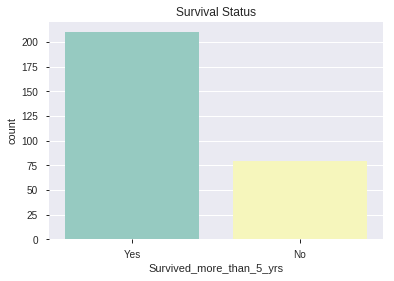

In [18]:
sns.countplot(x='Survived_more_than_5_yrs', data=bcs_df, palette='Set3').set_title('Survival Status')

#### Observation:

It is inferred that the patients survived more than 5 years is greater than the patients died within 5 years

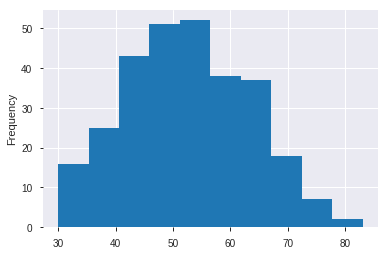

In [19]:
bcs_df['Age'].plot.hist()

#### Observation:

From the above graph, we can see that more no. of people affected are between the age 45 to 55

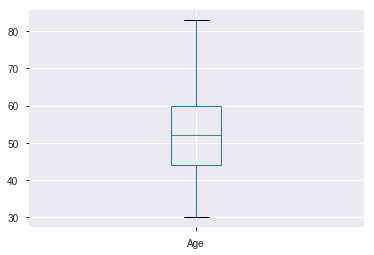

In [20]:
# Box Plot
bcs_df['Age'].plot.box()

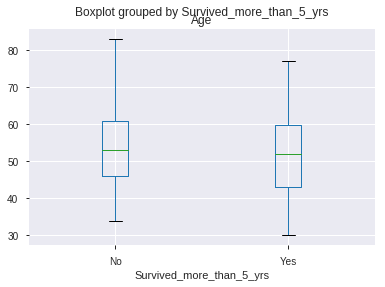

In [21]:
# Box Plot of Age w.r.t Status
bcs_df.boxplot(by = 'Survived_more_than_5_yrs', column = 'Age')

### 8.2 Most operations happened in the year

In [22]:
# Patients year of operation
bcs_df['Years_of_operation'].unique()

array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68])

In [23]:
# Maximum operation happened in the year
bcs_df['Years_of_operation'].value_counts()

58    34
64    28
63    28
65    27
66    26
60    26
67    25
59    25
61    24
62    22
68    13
69    11
Name: Years_of_operation, dtype: int64

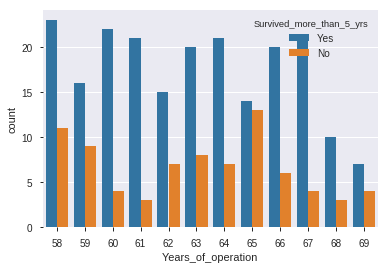

In [24]:
#sns.countplot(x='Survived_more_than_5_yrs', hue='Years_of_operation', data=bcs_df)
sns.countplot(x='Years_of_operation', hue='Survived_more_than_5_yrs', data=bcs_df)

#### Observation:

From the data it is seen that in the year 1958 maximum operations are done and the count got decreased with the increase in years

### 8.3 Relation between Pos_axillary_nodes and Survival Status

In [25]:
# Checking the relation between Pos_axillary_nodes and Status
# It is observed that 103 patients survived more than 5 years where pos_axillary_nodes are 0
pan_zeros_df = bcs_df[bcs_df['Pos_axillary_nodes'] == 0]
pan_zeros_df['Survived_more_than_5_yrs'].value_counts()

Yes    103
No      18
Name: Survived_more_than_5_yrs, dtype: int64

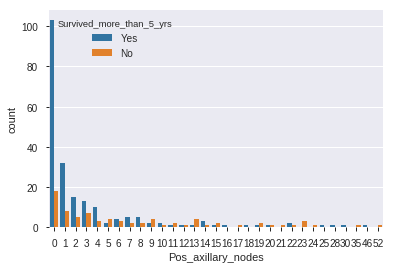

In [26]:
sns.countplot(x='Pos_axillary_nodes', hue='Survived_more_than_5_yrs', data=bcs_df)

#### Observation:

1. From the above plot, we can conclude that the chances of survival is more when Pos_axillary_nodes are less. The higher the no. of Pos_axillary_node the lesser the chances of survival
2. Almost 80 % of patients have less Pos_axillary_nodes
3. Patients who have more than 25 Pos_axillary_nodes have less chances of survival

### 8.4 Correlation between the variables

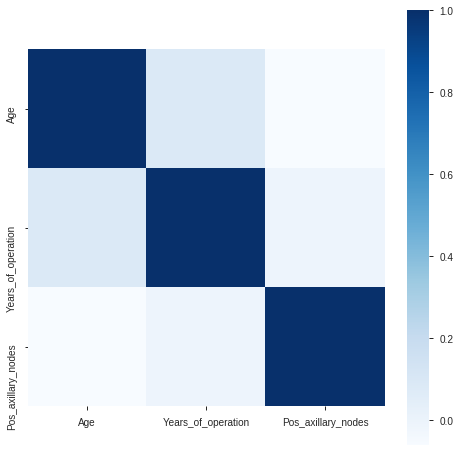

In [27]:
features_correlation = bcs_df.corr()
plt.figure(figsize=(8,8))
sns.heatmap(features_correlation,vmax=1,square=True,annot=False,cmap='Blues')
plt.show()

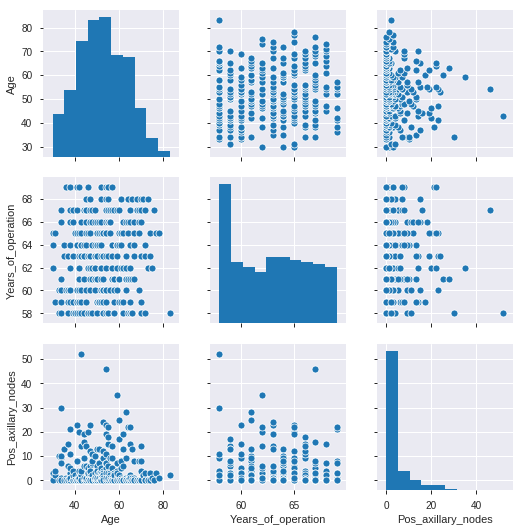

In [28]:
sns.pairplot(bcs_df)

<BarContainer object of 12 artists>

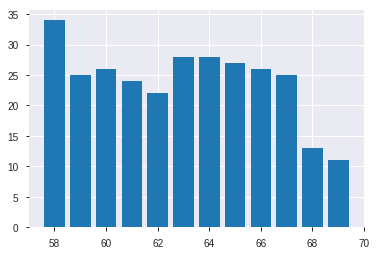

In [29]:
fig, ax = plt.subplots()
data = bcs_df['Years_of_operation'].value_counts()
points = data.index
frequency = data.values
ax.bar(points, frequency)

###### Observation

    1. From the above plot, it is clear that in the year 1958 the no. of opeartions are more when compared to rest of the years
    2. The last 2 years, 1968 & 1969 the count has gradually gone down

Text(0.5, 1.0, 'Age Category Vs. Patient Status')

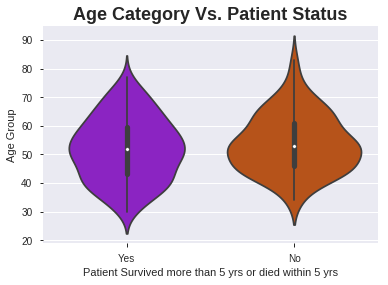

In [31]:
# Age Category vs Status

ax = sns.violinplot(x="Survived_more_than_5_yrs", y="Age", palette="gnuplot", data=bcs_df)
plt.xlabel("Patient Survived more than 5 yrs or died within 5 yrs")
plt.ylabel("Age Group")
plt.title("Age Category Vs. Patient Status", fontsize=18, fontweight = "bold")

#### Observation:

1. From the above Violin plot, we're trying to observe the no. of patients survived more than 5 yrs. or died within 5 yrs.
2. There is no much difference but we can see that the plot x axis "Yes" is compressed in the age group between 40 & 50 whereas the plot x axis "No" is not compressed.
3. Therefore, the no. of patients died in the age group 47 to 52 is little high compared to the other plot.
4. Overall, the count of no. of patients survived more than 5 yrs is greater than the patients died within 5 yrs.

### 9. Conclusion

- The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer
- 210 patients survived more than 5 years and 79 patients died within 5 years of operation
- The maximum age group affected by breast cancer is 45 - 55. So therefore there are high chances of risk in this age
- More no. of patients undergone surgery during 1958 to 1967 but there were less no. of opeartions happened in 1968 and 1969
- The patients surviving more than 5 years is more when the Pos_axillary_node is less. Patients with 0 Pos_axillary_node survive more then 5 yrs
- Almost 80 % of patients have less Pos_axillary_nodes
- Patients who have more than 25 Pos_axillary_nodes have less chances of survival